In [1]:
import datetime as dt
import pandas as pd
import pandas_datareader as pdr
import numpy as np
import datetime 

import matplotlib.pyplot as plt
from matplotlib import style

%matplotlib inline

In [2]:
#Enter the start date of stock analysis
date_entry = input('Enter a start date in YYYY-MM-DD format: ')
year, month, day = map(int, date_entry.split('-'))
start = datetime.date(year, month, day)

#Enter the end date of stock analysis
date_entry = input('Enter an end date in YYYY-MM-DD format: ')
year, month, day = map(int, date_entry.split('-'))
end = datetime.date(year, month, day)

Enter a start date in YYYY-MM-DD format: 2020-01-01
Enter an end date in YYYY-MM-DD format: 2021-01-01


In [3]:
## Import stockA data from Yahoo finance
TSLA=pdr.DataReader('TSLA', 'yahoo', start, end)
TSLA.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,86.139999,84.342003,84.900002,86.052002,47660500.0,86.052002
2020-01-03,90.800003,87.384003,88.099998,88.601997,88892500.0,88.601997
2020-01-06,90.311996,88.000000,88.094002,90.307999,50665000.0,90.307999
2020-01-07,94.325996,90.671997,92.279999,93.811996,89410500.0,93.811996
2020-01-08,99.697998,93.646004,94.739998,98.428001,155721500.0,98.428001


In [4]:
TSLA_=TSLA[['Adj Close']]
TSLA_

,Adj Close
Date,
2020-01-02,86.052002
2020-01-03,88.601997
2020-01-06,90.307999
2020-01-07,93.811996
2020-01-08,98.428001
...,...
2020-12-24,661.770020
2020-12-28,663.690002
2020-12-29,665.989990


In [5]:
TSLA_.index
TSLA_.columns

TSLA_.rename(columns = {"Adj Close": "Adj_Close"}, inplace= True)
TSLA_

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Adj_Close
Date,
2020-01-02,86.052002
2020-01-03,88.601997
2020-01-06,90.307999
2020-01-07,93.811996
2020-01-08,98.428001
...,...
2020-12-24,661.770020
2020-12-28,663.690002
2020-12-29,665.989990


In [6]:
## Import stockB data from Yahoo Finance
GOOG=pdr.DataReader('GOOG', 'yahoo', start, end)
GOOG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,1368.140015,1341.550049,1341.550049,1367.369995,1406600,1367.369995
2020-01-03,1372.500000,1345.543945,1347.859985,1360.660034,1186400,1360.660034
2020-01-06,1396.500000,1350.000000,1350.000000,1394.209961,1732300,1394.209961
2020-01-07,1402.989990,1390.380005,1397.939941,1393.339966,1502700,1393.339966
2020-01-08,1411.579956,1390.839966,1392.079956,1404.319946,1528000,1404.319946


In [7]:
GOOG_=GOOG[['Adj Close']]
GOOG_

,Adj Close
Date,
2020-01-02,1367.369995
2020-01-03,1360.660034
2020-01-06,1394.209961
2020-01-07,1393.339966
2020-01-08,1404.319946
...,...
2020-12-24,1738.849976
2020-12-28,1776.089966
2020-12-29,1758.719971


In [8]:
GOOG_.index
GOOG_.columns
GOOG_.rename(columns = {"Adj Close": "Adj_Close"}, inplace= True)
GOOG_.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Adj_Close
Date,
2020-01-02,1367.369995
2020-01-03,1360.660034
2020-01-06,1394.209961
2020-01-07,1393.339966
2020-01-08,1404.319946


1. TREND ANALYSIS

How is my stocks trend? Upward or downward trend?

In [9]:
#Calculate exponential weighted moving average and moving average

def trend_analysis (df):
  df['Weighted_Moving_Average']=df['Adj_Close'].ewm(span=50,adjust=False).mean()
  df['Moving_Average']=df['Adj_Close'].rolling(window=1).mean()

  return df

In [10]:
trend_analysis(TSLA_)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Adj_Close,Weighted_Moving_Average,Moving_Average
Date,,,
2020-01-02,86.052002,86.052002,86.052002
2020-01-03,88.601997,86.152002,88.601997
2020-01-06,90.307999,86.314982,90.307999
2020-01-07,93.811996,86.608983,93.811996
2020-01-08,98.428001,87.072474,98.428001
...,...,...,...
2020-12-24,661.770020,541.764024,661.770020
2020-12-28,663.690002,546.545435,663.690002
2020-12-29,665.989990,551.229535,665.989990


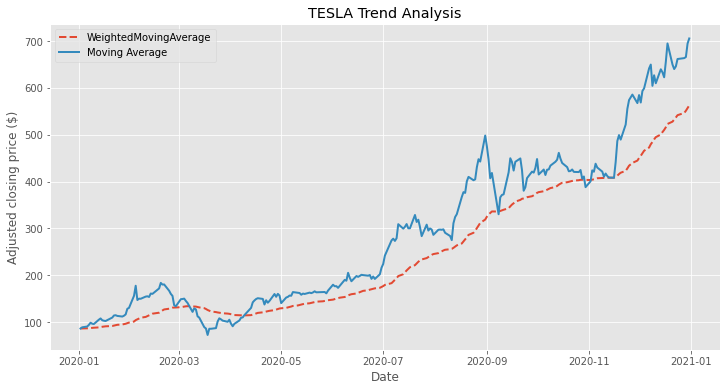

In [11]:
## Plot WMA and MA for TSLA

plt.style.use('ggplot')
plt.figure(figsize = (12,6))


plt.plot(TSLA_['Weighted_Moving_Average'], label='WeightedMovingAverage',linestyle='--', linewidth = 2)
plt.plot(TSLA_['Moving_Average'], label='Moving Average',linestyle='-', linewidth = 2)

plt.xlabel('Date')
plt.ylabel('Adjusted closing price ($)')
plt.title('TESLA Trend Analysis')
plt.legend()
plt.show()

In [12]:
TSLA_.describe()

,Adj_Close,Weighted_Moving_Average,Moving_Average
count,253.000000,253.000000,253.000000
mean,289.997067,243.839968,289.997067
std,168.995613,137.084626,168.995613
min,72.244003,86.052002,72.244003
25%,149.792007,126.770351,149.792007
50%,241.731995,179.189804,241.731995
75%,421.200012,375.880208,421.200012
max,705.669983,562.694692,705.669983


In [13]:
trend_analysis(GOOG_)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Adj_Close,Weighted_Moving_Average,Moving_Average
Date,,,
2020-01-02,1367.369995,1367.369995,1367.369995
2020-01-03,1360.660034,1367.106859,1360.660034
2020-01-06,1394.209961,1368.169726,1394.209961
2020-01-07,1393.339966,1369.156794,1393.339966
2020-01-08,1404.319946,1370.535741,1404.319946
...,...,...,...
2020-12-24,1738.849976,1714.045119,1738.849976
2020-12-28,1776.089966,1716.478250,1776.089966
2020-12-29,1758.719971,1718.134788,1758.719971


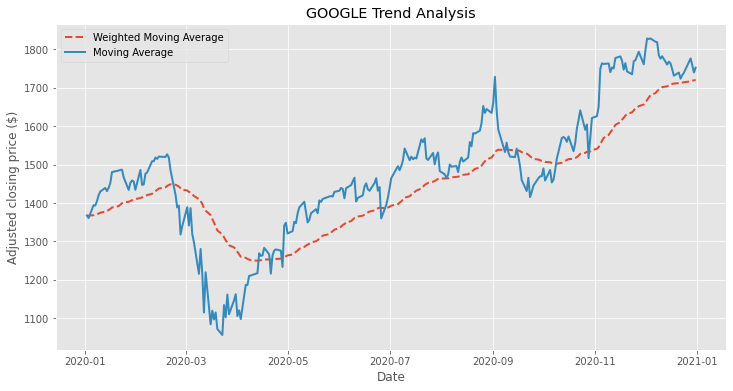

In [14]:
## Plot WMA and MA for Google

plt.style.use('ggplot')
plt.figure(figsize = (12,6))


plt.plot(GOOG_['Weighted_Moving_Average'], label='Weighted Moving Average',linestyle='--', linewidth = 2)
plt.plot(GOOG_['Moving_Average'], label='Moving Average',linestyle='-', linewidth = 2)

plt.xlabel('Date')
plt.ylabel('Adjusted closing price ($)')
plt.title('GOOGLE Trend Analysis')
plt.legend()
plt.show()

In [15]:
GOOG_.describe()

,Adj_Close,Weighted_Moving_Average,Moving_Average
count,253.000000,253.000000,253.000000
mean,1481.403811,1447.230293,1481.403811
std,175.967854,124.837515,175.967854
min,1056.619995,1249.832565,1056.619995
25%,1394.209961,1367.106859,1394.209961
50%,1476.229980,1434.117484,1476.229980
75%,1568.489990,1523.296255,1568.489990
max,1827.989990,1720.263879,1827.989990


2. Risk Analysis

How risky is my stock?

In [16]:
#Create a function that compares the standard deviation and returns which stock has a higher risk

def risk_analysis(df1, df2):
    std_SymbolA= df1.Adj_Close.std()
    std_SymbolB= df2.Adj_Close.std()
    
    if std_SymbolA > std_SymbolB:
        print ("Stock A is riskier than Stock B!")
    else:
        print ("Stock B is riskier than Stock A!")

In [17]:
# StockA=TSLA, StockB=GOOG

risk_analysis(TSLA_, GOOG_)

Stock B is riskier than Stock A!


Return Analysis

Daily and monthly returns of stocks

In [18]:
#Create a function that calculates daily return of stock
def daily_return_analysis(df):
    df["Daily_Returns"]=df["Adj_Close"].pct_change()
    
    return df

In [19]:
daily_return_analysis(TSLA_)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Adj_Close,Weighted_Moving_Average,Moving_Average,Daily_Returns
Date,,,,
2020-01-02,86.052002,86.052002,86.052002,NaN
2020-01-03,88.601997,86.152002,88.601997,0.029633
2020-01-06,90.307999,86.314982,90.307999,0.019255
2020-01-07,93.811996,86.608983,93.811996,0.038801
2020-01-08,98.428001,87.072474,98.428001,0.049205
...,...,...,...,...
2020-12-24,661.770020,541.764024,661.770020,0.024444
2020-12-28,663.690002,546.545435,663.690002,0.002901
2020-12-29,665.989990,551.229535,665.989990,0.003465


In [20]:
daily_return_analysis(GOOG_)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Adj_Close,Weighted_Moving_Average,Moving_Average,Daily_Returns
Date,,,,
2020-01-02,1367.369995,1367.369995,1367.369995,NaN
2020-01-03,1360.660034,1367.106859,1360.660034,-0.004907
2020-01-06,1394.209961,1368.169726,1394.209961,0.024657
2020-01-07,1393.339966,1369.156794,1393.339966,-0.000624
2020-01-08,1404.319946,1370.535741,1404.319946,0.007880
...,...,...,...,...
2020-12-24,1738.849976,1714.045119,1738.849976,0.003735
2020-12-28,1776.089966,1716.478250,1776.089966,0.021416
2020-12-29,1758.719971,1718.134788,1758.719971,-0.009780


In [21]:
## Create a function which plots Daily Returns of stocks on the same graph
def plot_daily_returns(df1,df2):
    plt.style.use('ggplot')
    plt.figure(figsize = (12,6))

    plt.plot(df1['Daily_Returns'], label='Daily Returns TSLA',linestyle='--', linewidth = 2, color= 'r')
    plt.plot(df2['Daily_Returns'], label='Daily Returns GOOG',linestyle='-', linewidth = 2, color = 'b')

    plt.xlabel('Date')
    plt.ylabel('Daily Returns ($)')
    plt.title('Daily Return Analysis')
    plt.legend()
    plt.show()

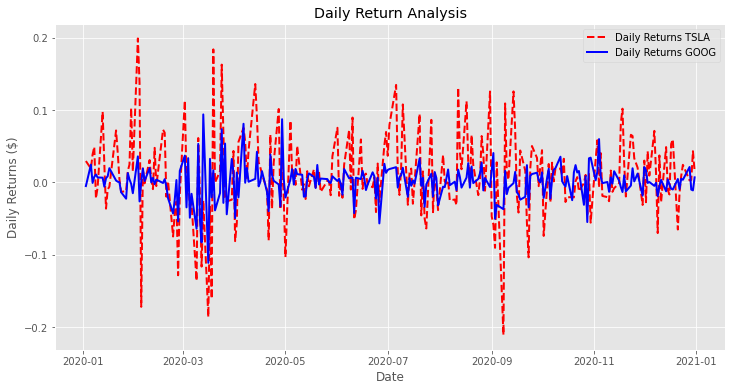

In [22]:
plot_daily_returns(TSLA_, GOOG_)

In [23]:
#monthly return of stock
TSLA_Monthly_Returns=TSLA_['Adj_Close'].resample('M').ffill().pct_change()[1:]
TSLA_Monthly_Returns

Date
2020-02-29    0.026777
2020-03-31   -0.215557
2020-04-30    0.492137
2020-05-31    0.067939
2020-06-30    0.293186
2020-07-31    0.325011
2020-08-31    0.741452
2020-09-30   -0.139087
2020-10-31   -0.095499
2020-11-30    0.462736
2020-12-31    0.243252
Freq: M, Name: Adj_Close, dtype: float64

In [24]:
#monthly return of stock
GOOG_Monthly_Returns=GOOG_['Adj_Close'].resample('M').ffill().pct_change()[1:]
GOOG_Monthly_Returns

Date
2020-02-29   -0.066168
2020-03-31   -0.131797
2020-04-30    0.159828
2020-05-31    0.059511
2020-06-30   -0.010714
2020-07-31    0.049059
2020-08-31    0.101972
2020-09-30   -0.100711
2020-10-31    0.103028
2020-11-30    0.086199
2020-12-31   -0.005032
Freq: M, Name: Adj_Close, dtype: float64

In [25]:
## Create a function which plots Monthly Returns of stocks on the same graph
def plot_monthly_returns(df1,df2):
    plt.style.use('ggplot')
    plt.figure(figsize = (12,6))

    plt.plot(df1["Adj_Close"].resample('M').ffill().pct_change()[1:],label='Monthly Returns TSLA',linestyle='--', linewidth = 2, color= 'r')
    plt.plot(df2["Adj_Close"].resample('M').ffill().pct_change()[1:],label='Monthly Returns GOOG',linestyle='-', linewidth = 2, color= 'b')

    plt.xlabel('Date')
    plt.ylabel('Monthly Returns ($)')
    plt.title('Monthly Return Analysis')
    plt.legend()
    plt.show()

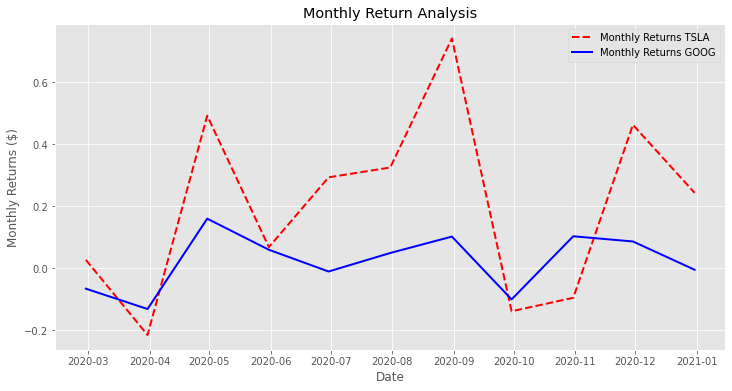

In [26]:
plot_monthly_returns(TSLA_, GOOG_)